# Income and Wealth Inequality

Imagine two societies, each with one million people, where in the first society, the yearly income of one man is $100,000,000$ and the income of the others are zero.
In the second society, the yearly income of everyone is $100$.

These countries have the same income per capita (average income is $100) but the lives of the people will be very different (e.g., almost everyone in the first society is starving, even though one person is fabulously rich).

The example above suggests that we should go beyond simple averages when we study income and wealth.

This leads us to the topic of **economic inequality**, which examines how income and wealth (and other quantities) are distributed across a population.

In this lecture we study inequality, beginning with measures of inequality and then applying them to wealth and income data from the US and other countries.

Inequality also changes over the **business cycle** because people are not equally affected (think, for example, of those people that lose their jobs in a recession vs. those that don't). 

But the reverse can be true, too: inequality can affect business cycles. Consider two examples: (1) if it's mainly poor households with no savings that lose their jobs in recessions, then they have to decrease their spending more than (2) if it's mainly rich households with a lot of savings that lose their jobs. So, inequality can matter for business cycles (and growth) and therefore, policymakers also care about inequality, not just for the sake of inequality (in the two recession examples, who should the government help out if they want to dampen the recession?)

### Some history 

Many historians argue that inequality played a key role in the fall of the
Roman Republic.

After defeating Carthage and invading Spain, money flowed into Rome and
greatly enriched those in power.

Meanwhile, ordinary citizens were taken from their farms to fight for long
periods, diminishing their wealth.

The resulting growth in inequality caused political turmoil that shook the
foundations of the republic.

This history is fascinating in its own right, and we can see some
parallels with certain countries in the modern world.

Many recent political debates revolve around inequality.

Many economic policies, from taxation to the welfare state, are
aimed at addressing inequality.

### Measurement

One problem with these debates is that inequality is often poorly defined.

Moreover, debates on inequality are often tied to political beliefs.

This is dangerous for economists because allowing political beliefs to
shape our findings reduces objectivity.

To bring a truly scientific perspective to the topic of inequality we must
start with careful definitions.

In this lecture we discuss standard measures of inequality used in economic research.

For each of these measures, we will look at both simulated and real data.

We will need to install the following library.

In [6]:
pip install --upgrade quantecon interpolation

Note: you may need to restart the kernel to use updated packages.


And we use the following imports.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
import random as rd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## The Lorenz curve

One popular measure of inequality is the [Lorenz curve](https://en.wikipedia.org/wiki/Lorenz_curve).

We will first define the Lorenz curve and then examine its properties.

### Definition

The Lorenz curve takes a sample $ w_1, \ldots, w_n $ and produces a curve $ L $.

We suppose that the sample $ w_1, \ldots, w_n $ has been sorted from smallest to largest.

For interpretation, suppose that we are measuring wealth

- $ w_1 $ is the wealth of the poorest member of the population and  
- $ w_n $ is the wealth of the richest member of the population.  


The curve $ L $ is just a function $ y = L(x) $ that we can plot and interpret. 

To create it we first generate data points $ (x_i, y_i) $  according to

$$
\begin{equation*}
    x_i = \frac{i}{n},
    \qquad
    y_i = \frac{\sum_{j \leq i} w_j}{\sum_{j \leq n} w_j},
    \qquad i = 1, \ldots, n
\end{equation*}
$$

x is number in ordering (position) divided by number ppl in ordering 

y coordinate comes from sum of wealth up to that position divided by total sum of wealth


Now the Lorenz curve $ L $ is formed from these data points using interpolation (that means we basically just connect the individual points by drawing a curve through them. If we use a line plot in Matplotlib, the interpolation will be done for us.)

The meaning of the statement $ y = L(x) $ is that the lowest $ (100
\times x) $% of people have $ (100 \times y) $% of all wealth.

- if $ x=0.5 $ and $ y=0.1 $, then the bottom 50% of the population
  owns 10% of the wealth.  


These ideas do not just apply to wealth but the same ideas apply to income, consumption, etc.

To implement these calculations, we will use the function `lorenz_curve` from the `quantecon` library to compute the $x_i$ and $y_i$ (we just have to feed in the $w_i$).

### Lorenz curves of simulated data

Let’s look at an example.

will compare to 45 degree line,, where all of people are equal, 1/3 of population and 1/3 of wealth 
more convex more unequal society 

In the next figure, we generate $ n=2000 $ draws from a [lognormal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution) and treat these draws as our population. in a lognormal, log of it is then a normal distribution.

The straight line ($ x=L(x) $ for all $ x $) corresponds to perfect equality.

The lognormal draws produce a less equal distribution.

For example, if we imagine these draws as being observations of wealth across
a sample of households, then the dashed lines show that the bottom 80% of
households own just over 40% of total wealth.

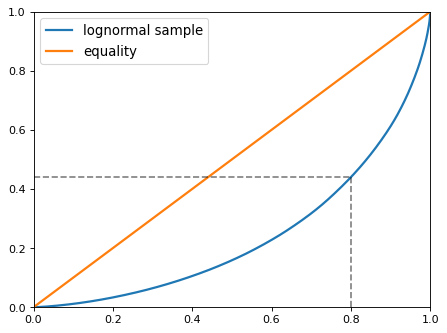

In [12]:
n = 2000 #2000 observations 
sample = np.exp(np.random.randn(n)) #lognormal: the logarithm of "sample" is normally distributed
fig, ax = plt.subplots(dpi=80)

f_vals, l_vals = qe.lorenz_curve(sample)  #put sample into curve , f_val i xi, l_val is yi 
ax.plot(f_vals, l_vals, label='lognormal sample', lw=2) #then plot points 
ax.plot(f_vals, f_vals, label='equality', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.44], alpha=0.5, colors='k', ls='--')
ax.hlines([0.44], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

plt.show()

### Lorenz curves for US data

Next let’s look at the real data, focusing on income and wealth in the US in
2016.

The following code block imports a subset of the dataset `SCF_plus`,
which is derived from the [Survey of Consumer Finances](https://en.wikipedia.org/wiki/Survey_of_Consumer_Finances) (SCF).

In [14]:
url = 'https://media.githubusercontent.com/media/QuantEcon/high_dim_data/main/SCF_plus/SCF_plus_mini.csv'
df = pd.read_csv(url)
df = df.dropna()
df_income_wealth = df

In [15]:
df_income_wealth.sample(5) #5 indicate first 5 observations 

,year,n_wealth,t_income,l_income,weights,nw_groups,ti_groups
142418,1962,74482.05000,35522.600,29017.328,2.585250,50-90%,0-50%
145772,1962,-268.18848,25546.043,43884.117,1.920209,0-50%,0-50%
465831,2013,25045.54700,60672.850,58580.684,5.855218,0-50%,50-90%
55641,1953,33294.66400,4795.933,0.000,1.677489,0-50%,0-50%
184188,1968,33545.01600,41043.484,41212.355,1.577176,0-50%,0-50%


In [16]:
df_income_wealth.describe()

,year,n_wealth,t_income,l_income,weights
count,509455.000000,5.094550e+05,5.094550e+05,5.094550e+05,509455.000000
mean,1982.122062,4.512145e+06,3.255242e+05,9.525005e+04,3.294007
std,22.607350,3.477071e+07,3.160138e+06,8.316296e+05,2.671516
min,1950.000000,-2.340803e+08,-8.001954e+07,0.000000e+00,0.000000
25%,1959.000000,1.357817e+04,2.614322e+04,0.000000e+00,1.207430
50%,1983.000000,8.484058e+04,4.812237e+04,3.247179e+04,2.380133
75%,2004.000000,3.622574e+05,9.077778e+04,6.582137e+04,5.017505
max,2016.000000,2.928346e+09,3.056805e+08,1.115575e+08,31.052229


The following code block uses data stored in dataframe `df_income_wealth` to generate the Lorenz curves.

(The code is somewhat complex because we need to adjust the data according to
population weights supplied by the SCF, but don't worry about that part.)

In [18]:
df = df_income_wealth 

varlist = ['n_wealth',    # net wealth 
           't_income',    # total income
           'l_income']    # labor income

years = df.year.unique() #object to give unique values per year 
#years = [2016]
# Create lists to store Lorenz data

F_vals, L_vals = [], []

for var in varlist:
    # create lists to store Lorenz curve data
    f_vals = []
    l_vals = []
    for year in years:

        # Repeat the observations according to their weights
        counts = list(round(df[df['year'] == year]['weights'] )) 
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        #print(y.size)
        #print(df[df['year'] == year][var].size)
        
         
               
        # calculate and store Lorenz curve data
        f_val, l_val = qe.lorenz_curve(y)
        f_vals.append(f_val)
        l_vals.append(l_val)
        
    F_vals.append(f_vals)
    L_vals.append(l_vals)

f_vals_nw, f_vals_ti, f_vals_li = F_vals
l_vals_nw, l_vals_ti, l_vals_li = L_vals
df[df['year'] == year].describe()

,year,n_wealth,t_income,l_income,weights
count,31240.0,3.124000e+04,3.124000e+04,3.124000e+04,31240.000000
mean,2016.0,1.183062e+07,6.617660e+05,1.522375e+05,4.027497
std,0.0,6.731260e+07,5.042260e+06,1.409642e+06,2.169072
min,2016.0,-2.089970e+06,-9.113728e+06,0.000000e+00,0.002598
25%,2016.0,1.567750e+04,3.139173e+04,0.000000e+00,3.136527
50%,2016.0,1.876500e+05,6.885927e+04,3.544227e+04,4.249118
75%,2016.0,1.150900e+06,1.568827e+05,9.316255e+04,5.304613
max,2016.0,1.703800e+09,3.056805e+08,9.403342e+07,12.782739


Now we plot Lorenz curves for net wealth, total income and labor income in the
US in 2016.

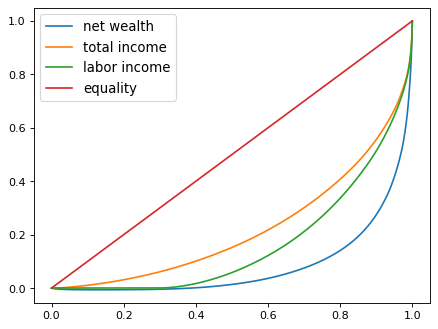

In [20]:
fig, ax = plt.subplots(dpi=80)

ax.plot(f_vals_nw[-1], l_vals_nw[-1], label=f'net wealth')
ax.plot(f_vals_ti[-1], l_vals_ti[-1], label=f'total income')
ax.plot(f_vals_li[-1], l_vals_li[-1], label=f'labor income')
ax.plot(f_vals_nw[-1], f_vals_nw[-1], label=f'equality')

ax.legend(fontsize=12)   
plt.show()

Here all the income and wealth measures are pre-tax.

Total income is the sum of households’ all income sources, including labor income but excluding capital gains. less inequality than labor income

One key finding from this figure is that wealth inequality is significantly
more extreme than income inequality.

note - consumption not included but tends to be less inequality, btwn total income and equality line 

## The Gini coefficient

The Lorenz curve is a useful visual representation of inequality in a
distribution.

Another popular measure of income and wealth inequality is the Gini coefficient.

The Gini coefficient is just a number, rather than a curve.

In this section we discuss the Gini coefficient and its relationship to the
Lorenz curve.

captures inequality graphs in one number,,, computes diff btwn curve and equality line as a fraction of whole area under equality line

### Definition

As before, suppose that the sample $ w_1, \ldots, w_n $ has been sorted from
smallest to largest.

The Gini coefficient is defined for the sample above as


$$
\begin{equation}
    G :=
    \frac
        {\sum_{i=1}^n \sum_{j = 1}^n |w_j - w_i|}
        {2n\sum_{i=1}^n w_i}.
\end{equation} \notag
$$

The Gini coefficient is closely related to the Lorenz curve.

In fact, it can be shown that its value is twice the area between the line of
equality and the Lorenz curve (e.g., the shaded area in the following Figure below).

The idea is that $ G=0 $ indicates complete equality, while $ G=1 $ indicates complete inequality.

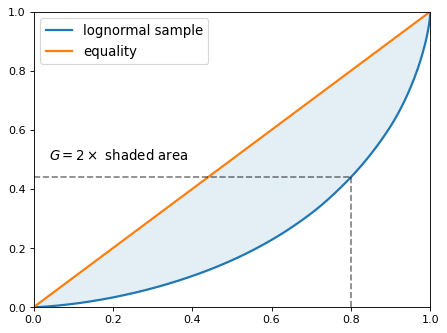

In [25]:
fig, ax = plt.subplots(dpi=80)

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'lognormal sample', lw=2)
ax.plot(f_vals, f_vals, label='equality', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.44], alpha=0.5, colors='k', ls='--')
ax.hlines([0.44], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.fill_between(f_vals, l_vals, f_vals, alpha=0.12)

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

ax.text(0.04, 0.5, r'$G = 2 \times$ shaded area', fontsize=12)
  
plt.show()

### Gini coefficient dynamics of simulated data

Let’s examine the Gini coefficient in some simulations.

The following code computes the Gini coefficients for five different
populations. We use the function `gini_coefficient` from the `quantecon` library.

Each of these populations is generated by drawing from a
lognormal distribution with parameters $ \mu $ (mean) and $ \sigma $ (standard deviation).

To create the five populations, we vary $ \sigma $ over a grid of length $ 5 $
between $ 0.2 $ and $ 4 $.

In each case we set $ \mu = - \sigma^2 / 2 $.    #correction for mean varying with sigma 

This implies that the mean of the distribution does not change with $ \sigma $.

(You can check this by looking up the expression for the mean of a lognormal
distribution.)

In [42]:
k = 5 #number of distributions 
σ_vals = np.linspace(0.2, 4, k) #changing st devs , 5 values equal apart btwn .2 and 4
n = 2_000 #2000 draws from each distribution
Y = [] #store
ginis = [] #store gini coefficients 

for σ in σ_vals: #loop thru volatility and see gini coefficinets
    μ = -σ**2 / 2 #always have mean of 1 and
    y = np.exp(μ + σ * np.random.randn(n)) # draw from a normal 
    Y.append(y)
    ginis.append(qe.gini_coefficient(y))

In [44]:
def plot_inequality_measures(x, y, legend, xlabel, ylabel):
    
    fig, ax = plt.subplots(dpi=80)
    ax.plot(x, y, marker='o', label=legend)

    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    ax.legend(fontsize=12)
    plt.show()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\saman\AppData\Local\Temp\ipykernel_17968\4111609879.py:4: SyntaxWarning: invalid escape sequence '\s'
  '$\sigma$',


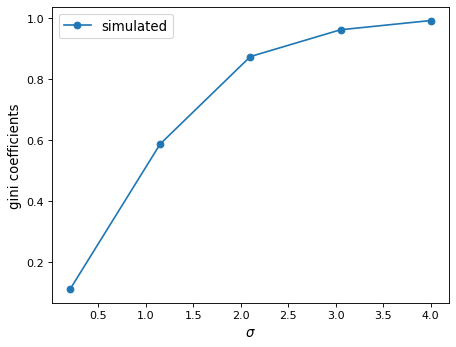

In [46]:
plot_inequality_measures(σ_vals, 
                         ginis, 
                         'simulated', 
                         '$\sigma$', 
                         'gini coefficients')

The plots show that inequality rises with $ \sigma $, according to the Gini
coefficient. The distribution becomes more spread out (the distribution gets more "right skewed", i.e., it puts more mass on the right tail, rich become richer and distributino become more unequal).

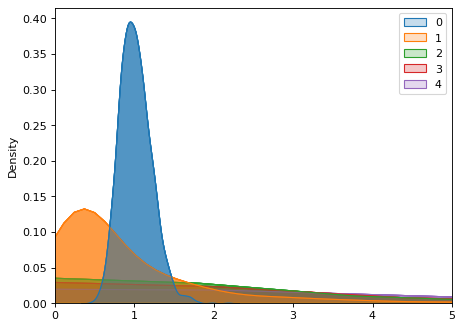

In [51]:
import seaborn as sns

Y_df = pd.DataFrame(Y)
fig, ax = plt.subplots(dpi=80)
for i, sigma in enumerate(σ_vals):
    sns.kdeplot(Y_df.T, fill=True)
ax.set_xlim(0,5)
plt.show()

In [53]:
# look at solution for a spcific coe for simulated data 

### Gini coefficient dynamics for US data

Now let’s look at Gini coefficients for US data derived from the SCF.

The following code creates a list called `Ginis`.

It stores data of Gini coefficients generated from the dataframe `df_income_wealth` and  [gini_coefficient](https://quanteconpy.readthedocs.io/en/latest/tools/inequality.html#quantecon.inequality.gini_coefficient), from the QuantEcon library.

In [56]:
varlist = ['n_wealth',   # net wealth 
           't_income',   # total income
           'l_income']   # labor income

df = df_income_wealth

# create lists to store Gini for each inequality measure

Ginis = []

for var in varlist:
    # create lists to store Gini
    ginis = []
    
    for year in years:
        # repeat the observations according to their weights
        counts = list(round(df[df['year'] == year]['weights'] ))
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        
        # calculate and store Gini
        gini = qe.gini_coefficient(y)
        ginis.append(gini)
        
    Ginis.append(ginis)

In [57]:
ginis_nw, ginis_ti, ginis_li = Ginis

Let’s plot the Gini coefficients for net wealth, labor income and total income.

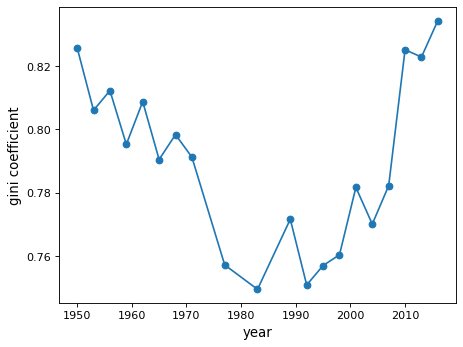

In [61]:
xlabel = "year"
ylabel = "gini coefficient"

fig, ax = plt.subplots(dpi=80)

ax.plot(years, ginis_nw, marker='o')

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)
    
plt.show()

from 1950 to 80s/90s welfare inequality strongly dec in us, but since then has now increased to previous values
why? regulation after wwii dec ineuality, 80s high inflation erode savings benefit borrows, after deregulation in markets inc inequality and asset prices 

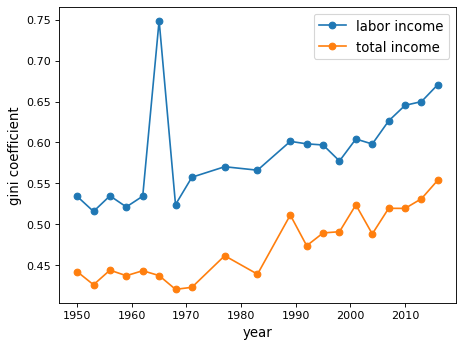

In [64]:
xlabel = "year"
ylabel = "gini coefficient"

fig, ax = plt.subplots(dpi=80)

ax.plot(years, ginis_li, marker='o', label="labor income")
ax.plot(years, ginis_ti, marker='o', label="total income")

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

ax.legend(fontsize=12)
plt.show()

We see that, by this measure, inequality in wealth and income has risen
substantially since 1980.
high point in labor income is outlier from data issues 

The wealth time series exhibits a strong U-shape.

There is, however, an outlier in the labor income series. Let's fix this:

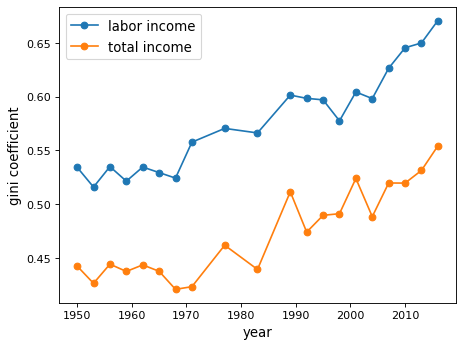

In [70]:
ginis_li_new = ginis_li
ginis_li_new[5] = (ginis_li[4]+ginis_li[6])/2 #replace outlier with an average of ones surrounding it 

xlabel = "year"
ylabel = "gini coefficient"

fig, ax = plt.subplots(dpi=80)

ax.plot(years, ginis_li_new, marker='o', label="labor income")
ax.plot(years, ginis_ti, marker='o', label="total income")

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

ax.legend(fontsize=12)
plt.show()

If you are interested in these topics, check out [this website](https://wid.world) which provides a lot of different inequality measures for a number of countries for a extensive time period.